# Classification: Bank Marketing Campaign

#### Created by: Erlangga Hario Roesdyoko - JCDSOL008


# Background 

In the 21st century, the fourth industrial revolution is happening, where technology revolutionized the world in which it has a significant role in increasing interconnectivity and smart automation. In the fourth industrial revolution, technological developments in cyber-physical systems including big data, cloud computing, artifical intelligence, internet of things, virtual reality systems, robotics, so on and so forth. Thus, Technology is the locomotive for changes both in industry and society.

A Financial Instution company, namely Bank X, is aware the importance of data and how a data-driven decision making could positively impact the outcome.
In this case, Bank X wants to analyze what is kind of customer whose more likely to accept a deposit and also predict the likelihood of customers with similar background to commit for a deposit.

Target (Deposit):
0: No Deposit
1: Deposit


# What is Deposit?

**Deposit** is a monetary amount that an individual or organization places into a savings or checking account with a financial institution. The deposit earns interest and can be withdrawn or used as collateral for loans.

In this case, the financial institution that is involved is a bank and the deposit is subscribed based on the agreed terms.
The terms of deposit including time period, interest, interest due, penalty/compensation if the deposted money is withdrawn before the due date, and etc.

Deposit is an investment instrument with one of the highest level of security. The deposit interest is guaranteed by the issuing bank and in some country deposit is protected under a law that is supervised by the government. In Indonesia, Bank Deposit is supervised by Lembaga Penjamin Simpanan which evaluate and control the recommended deposit interest while also insured the customer's deposits.


# Problem Statement

Selling and Marketing a product without a targeted audience are time consuming and costly. Bank X want to analyze which customers are more likely to accept a deposit offer based on the historical data. Thus, the shortlised customers can be used as the targeted customer. Hence, it will increase the productivity and effectivity of the sales and marketing team.

Problem statement: Classify the type of customers who are likely to put a deposit

Goal: Predict the customer who are willing to put a deposit in the future

# Analytic Approach

Analyze data to find customer's similiraties that differentiates which customers who are likely to put a deposit and the opposite.
And then, build a classifcation model to predict the likelihood.


# Libraries Setup

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline

# Model
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Classification metrics
from sklearn.inspection import permutation_importance 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Function for creating model pipelines - sklearn
from sklearn.pipeline import make_pipeline

# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
import missingno as msno
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

### Features

### Customer Profile
- age
- job
- balance
- housing
- loan

### Marketing Data
- contact: Contact communication type
- month: Last contact month of the year
- campaign: Number of contacts performed during this campaing and for this client
- pdays: Number of days after the client was contacted from the previous campaign
- poutcome: Outcome of the previous marketing campaign
- deposit: The client's deposit subscription status

In [417]:
df=pd.read_csv('data_bank_marketing_campaign.csv', sep = ',')
display(df.head(),df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Number of rows: 7813
Number of columns: 11
Distribution of data type: 4 columns with int64 and 7 columns with object.
There is no null value indicated.


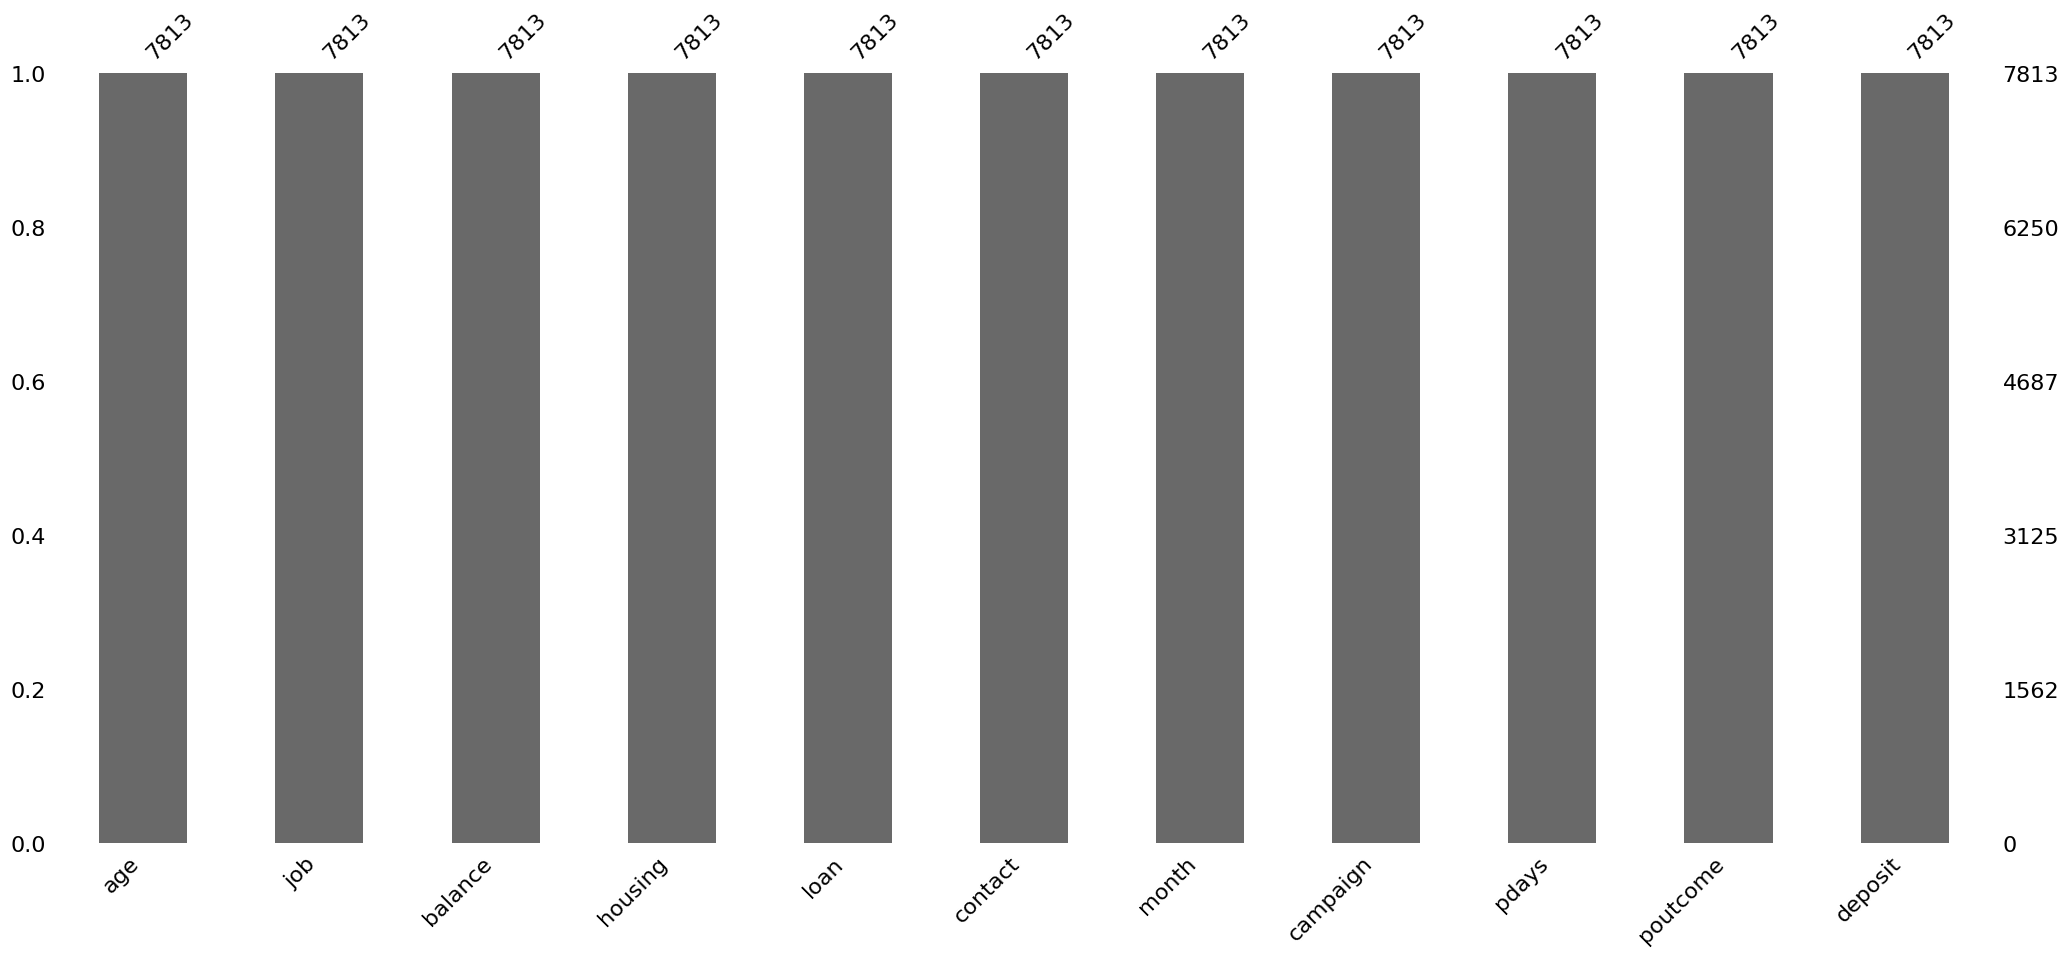

In [419]:
msno.bar(df)
plt.show()

In [420]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].max(),df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name','Max','Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Max,Number of Unique,Unique Sample
0,age,95,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,unknown,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,66653,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,yes,2,"[no, yes]"
4,loan,yes,2,"[no, yes]"
5,contact,unknown,3,"[cellular, telephone, unknown]"
6,month,sep,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,63,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,854,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,unknown,4,"[unknown, other, failure, success]"


The table above shows the number of unique value and the unique value from each columns.

What to do:
1. Change the deposit into boolean data type.

2. In job column, we will change the data with a value of 'admin.' into 'admin'.

3. In job, contact, and poutcome column there are entries filled with unknown and other values. Thus, it will be regarded as Null Values. In this case, there are 
null values in job, contact, and poutcome.

4. Check duplicate value.

#### 1. Change Target (Deposit column) into Boolean data type

In [421]:
def target_bool(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [422]:
df['deposit'] = df['deposit'].apply(target_bool)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


#### 2. Adjust the data in job column

In [423]:
def job_cat(x):
    if x == 'admin.':
        return 'admin'
    else:
        return x

In [424]:
df['job'] = df['job'].apply(job_cat)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


Data entry in the job column which has a value of 'admin.' has been changed into 'admin'.

Apparently, there is no Null Value detected in the data. If there were missing values we can fill them with median or mean, based on the result of data distribution result. However, there are unknown & other as the data entry for column: job, contact and poutcome.

#### 2.a. Check Null Values in Job column

In [425]:
df['job'][(df['job'] == 'unknown')].count()

54

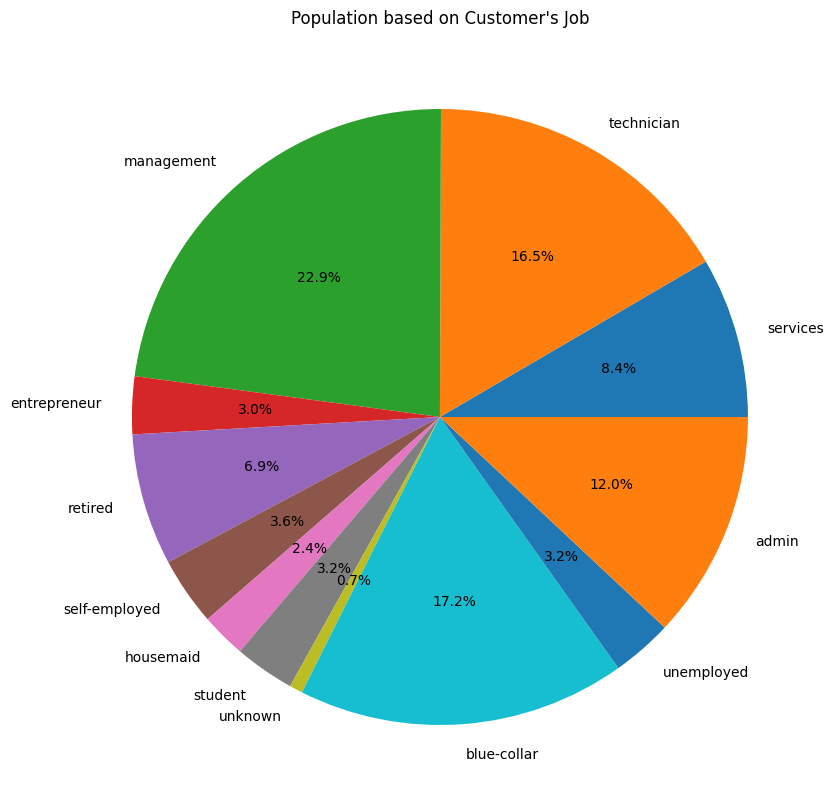

In [426]:
plt.figure(figsize = (15,10))
l,a = list(set(df['job'])),[]
for i in range(len(l)):
    a.append(df['job'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Population based on Customer\'s Job')
plt.show()

The population of job which has unknown value or null values is relatively low (below 0.7%). Since the population is low, it will not significantly change the outcome whether we impute the missing values or drop the data. Thus, we will remove the data in order to overcome the missing values problem. 

#### 2.b. Check Null Values in Contact column

In [427]:
df['contact'][(df['contact'] == 'unknown')].count()

1639

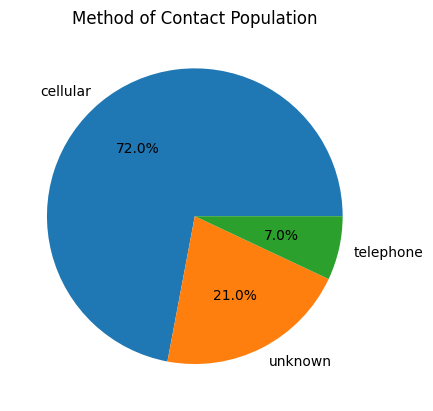

In [428]:
l,a = list(set(df['contact'])),[]
for i in range(len(l)):
    a.append(df['contact'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Method of Contact Population')
plt.show()

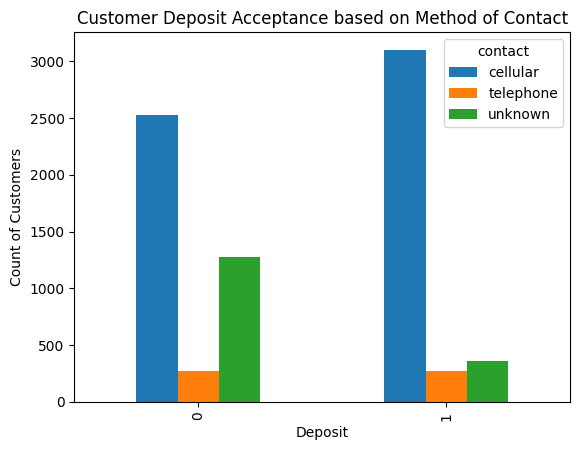

In [429]:
df_am1=pd.crosstab(df['deposit'],df['contact'])
barplot = df_am1.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Customer Deposit Acceptance based on Method of Contact')
plt.ylabel('Count of Customers')
plt.xlabel('Deposit')
plt.show()

From Method of Contact Population graph, we can conclude that the customer's mainly contacted by the bank through their cellular phone, since it covers 72% of the population. Meanwhile coming in second is the null values with a value of 21%.


#### 2.c. Check Null Values in Contact column

In [430]:
df['poutcome'][(df['poutcome'] == 'unknown')].count()

5819

In [431]:
df['poutcome'][(df['poutcome'] == 'other')].count()

385

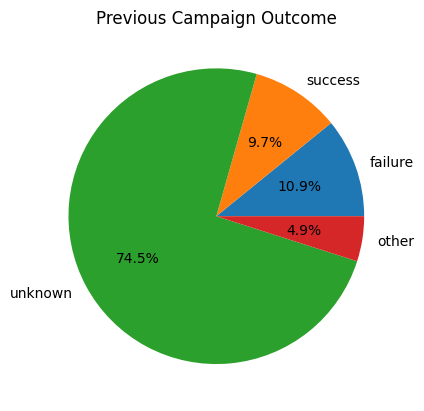

In [432]:
l,a = list(set(df['poutcome'])),[]
for i in range(len(l)):
    a.append(df['poutcome'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Previous Campaign Outcome')
plt.show()

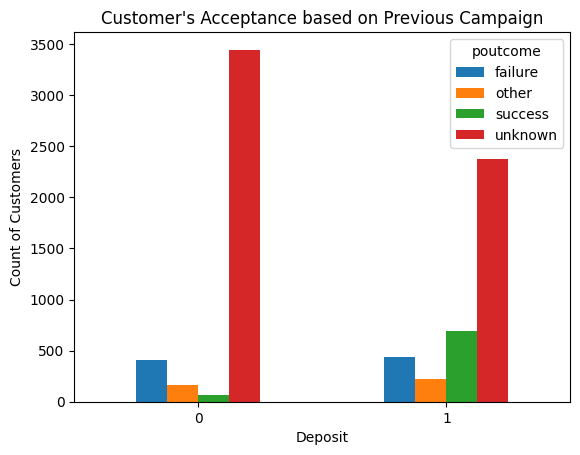

In [433]:
df_am1=pd.crosstab(df['deposit'],df['poutcome'])
barplot = df_am1.plot.bar(rot = 0)
# plt.xticks(rotation = 90)
plt.title('Customer\'s Acceptance based on Previous Campaign')
plt.ylabel('Count of Customers')
plt.xlabel('Deposit')
# plt.legend(['Not Accepted','Accepted'])
plt.show()

From both graphs we can see that the null values is dominating the population, hence it has an imbalanced dataset. Thus, it might unnecessarily increase the complexity of building the model. We will drop this column before we analyze it further with ML Classification model.

#### 3. Check Duplicate Value

In [434]:
df.duplicated().sum()

8

In [435]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1


There are 8 values that are duplicated. The duplicated data entries is shown above. The population of the duplicated values is very small. Thus, we will remove these entries from the dataset.

Before Treatment

In [436]:
df.describe().applymap(lambda x: f"{x:0.2f}")

,age,balance,campaign,pdays,deposit
count,7813.00,7813.00,7813.00,7813.00,7813.00
mean,41.26,1512.45,2.52,51.41,0.48
std,11.92,3089.29,2.73,108.07,0.50
min,18.00,-6847.00,1.00,-1.00,0.00
25%,32.00,127.00,1.00,-1.00,0.00
50%,39.00,549.00,2.00,-1.00,0.00
75%,49.00,1684.00,3.00,40.00,1.00
max,95.00,66653.00,63.00,854.00,1.00


The Descriptive Statistics of the given data is executed using describe function, and the key takeaways are shown below:
1. Mean:
    - Age = 41.26
    - Balance = 1,512
    - Number of Campaign = 2.5 ~ 3
2. Median:
    - Age = 39
    - Balance = 549
    - Number of Campaign = 2


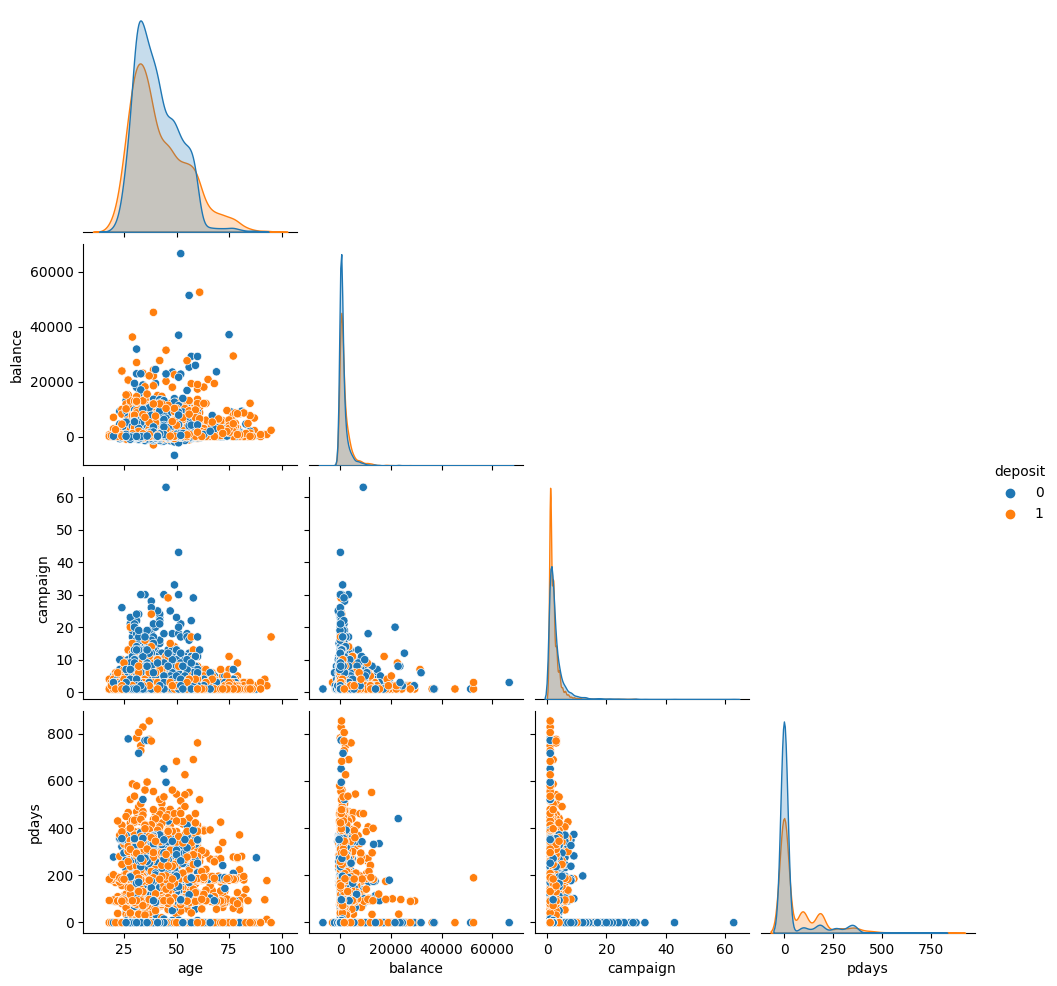

In [437]:
sns.pairplot(df,hue='deposit',corner=True)
plt.show()

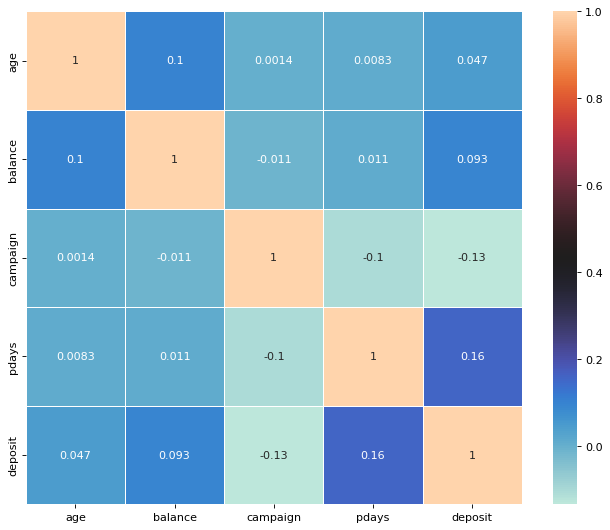

In [438]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidth=0.5)
plt.yticks(rotation=90)
plt.show()

In [439]:
fig = px.treemap(df, path=[px.Constant('balance'),'job'], values='balance',
                   hover_data=['job'])
fig.show()

In [440]:
# categories = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

# fig, axes = plt.subplots(nrows = len(categories), figsize = (15,40))

# for i in range(len(categories)):
#     axes[i].set_title(str(categories[i]))
#     sns.countplot(ax = axes[i], x = df[categories[i]], hue = df['deposit'])
#     axes[i].set(xlabel = '', ylabel = 'Number of Customers')
#     # axes[i].set_yscale('log')
#     axes[i].tick_params(axis = 'x', rotation = 90)

#     for k in axes[i].containers:
#         axes[i].bar_label(k)
        
#     plt.subplots_adjust(hspace = 0.5)

# After Treatment

In [441]:
df.drop_duplicates()
# df.drop('contact', inplace=True, axis=1)
df.drop('poutcome', inplace=True, axis=1)
df.drop(df.loc[df['job']=='unknown'].index, inplace=True)

In [442]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,1
2,51,admin,3025,no,no,cellular,may,1,352,1
3,38,services,-87,yes,no,cellular,may,1,-1,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,0


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7759 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7759 non-null   int64 
 1   job       7759 non-null   object
 2   balance   7759 non-null   int64 
 3   housing   7759 non-null   object
 4   loan      7759 non-null   object
 5   contact   7759 non-null   object
 6   month     7759 non-null   object
 7   campaign  7759 non-null   int64 
 8   pdays     7759 non-null   int64 
 9   deposit   7759 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 666.8+ KB


In [444]:
df.describe().applymap(lambda x: f"{x:0.2f}")

,age,balance,campaign,pdays,deposit
count,7759.00,7759.00,7759.00,7759.00,7759.00
mean,41.21,1508.56,2.52,51.40,0.48
std,11.90,3083.94,2.72,107.94,0.50
min,18.00,-6847.00,1.00,-1.00,0.00
25%,32.00,127.00,1.00,-1.00,0.00
50%,39.00,545.00,2.00,-1.00,0.00
75%,49.00,1682.50,3.00,39.00,1.00
max,95.00,66653.00,63.00,854.00,1.00


The Descriptive Statistics of the given data is executed using describe function, and the key takeaways are shown below:
1. Mean:
    - Age = 41.21 -- before 41.26
    - Balance = 1,508 -- before 1,512
    - Number of Campaign = 2.5 ~ 3
2. Median:
    - Age = 39
    - Balance = 545 -- before 549
    - Number of Campaign = 2


The Descriptive Statistics results show that there is no difference after dropping the duplicate values and rows with unknown values in job column.
Number of rows: 7759. A total of 54 rows has been removed.

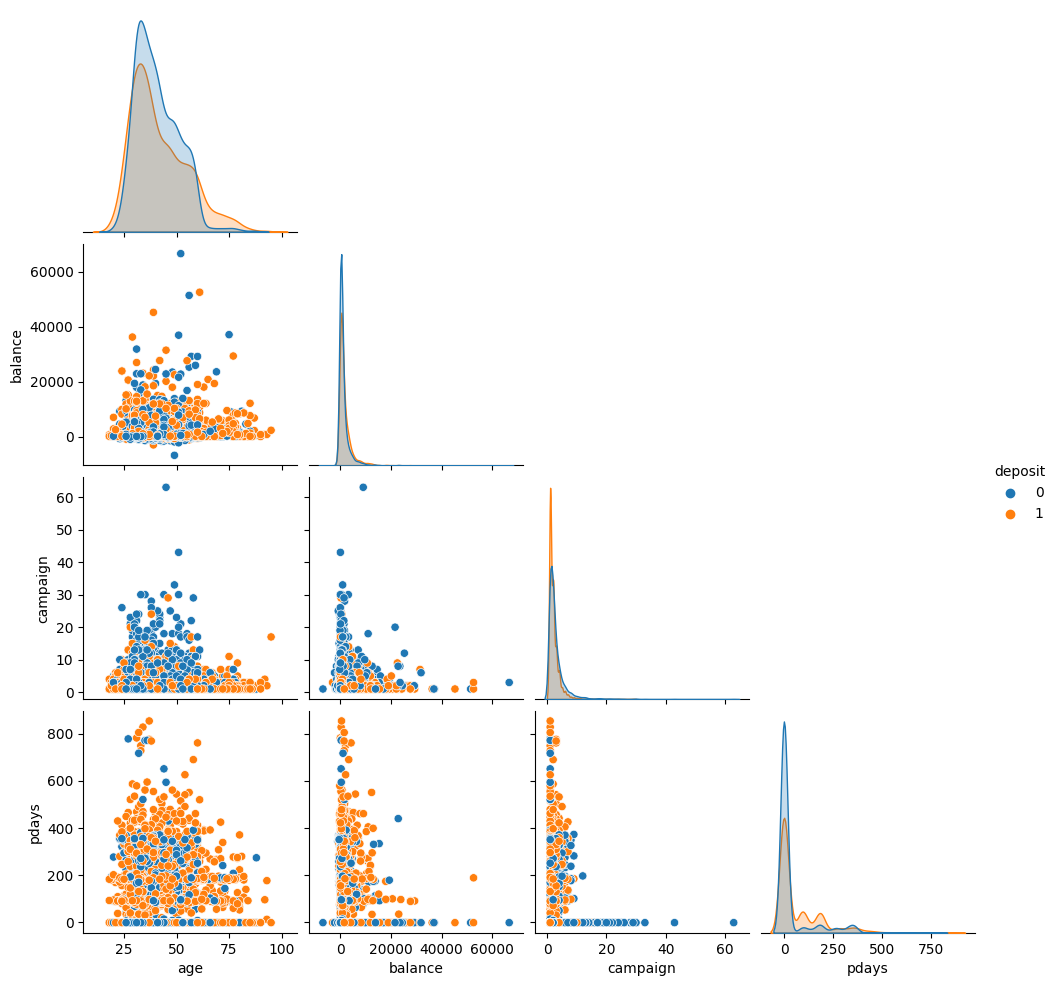

In [445]:
sns.pairplot(df,hue='deposit',corner=True)
plt.show()


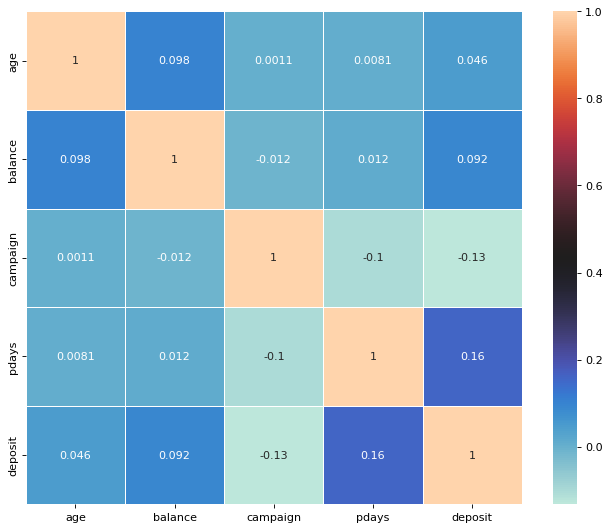

In [446]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidth=0.5)
plt.yticks(rotation=90)
plt.show()

In [447]:
fig = px.treemap(df, path=[px.Constant('balance'),'job'], values='balance',
                   hover_data=['job'])
fig.show()

# Target

Marketing success rate is aroind 48% so it is a balanced dataset.

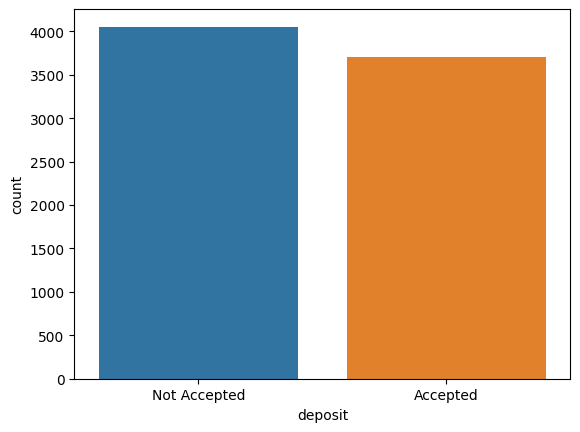

In [448]:
sns.countplot(data = df, x = 'deposit')
plt.xticks([0,1],['Not Accepted','Accepted'])
plt.show()

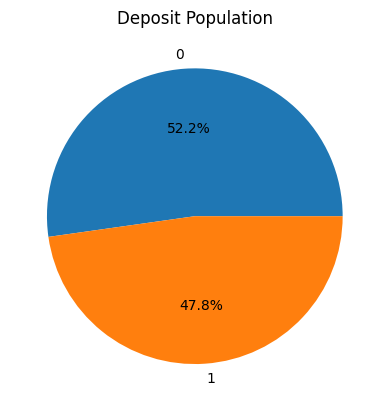

In [449]:
l,a = list(set(df['deposit'])),[]
for i in range(len(l)):
    a.append(df['deposit'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Deposit Population')
plt.show()

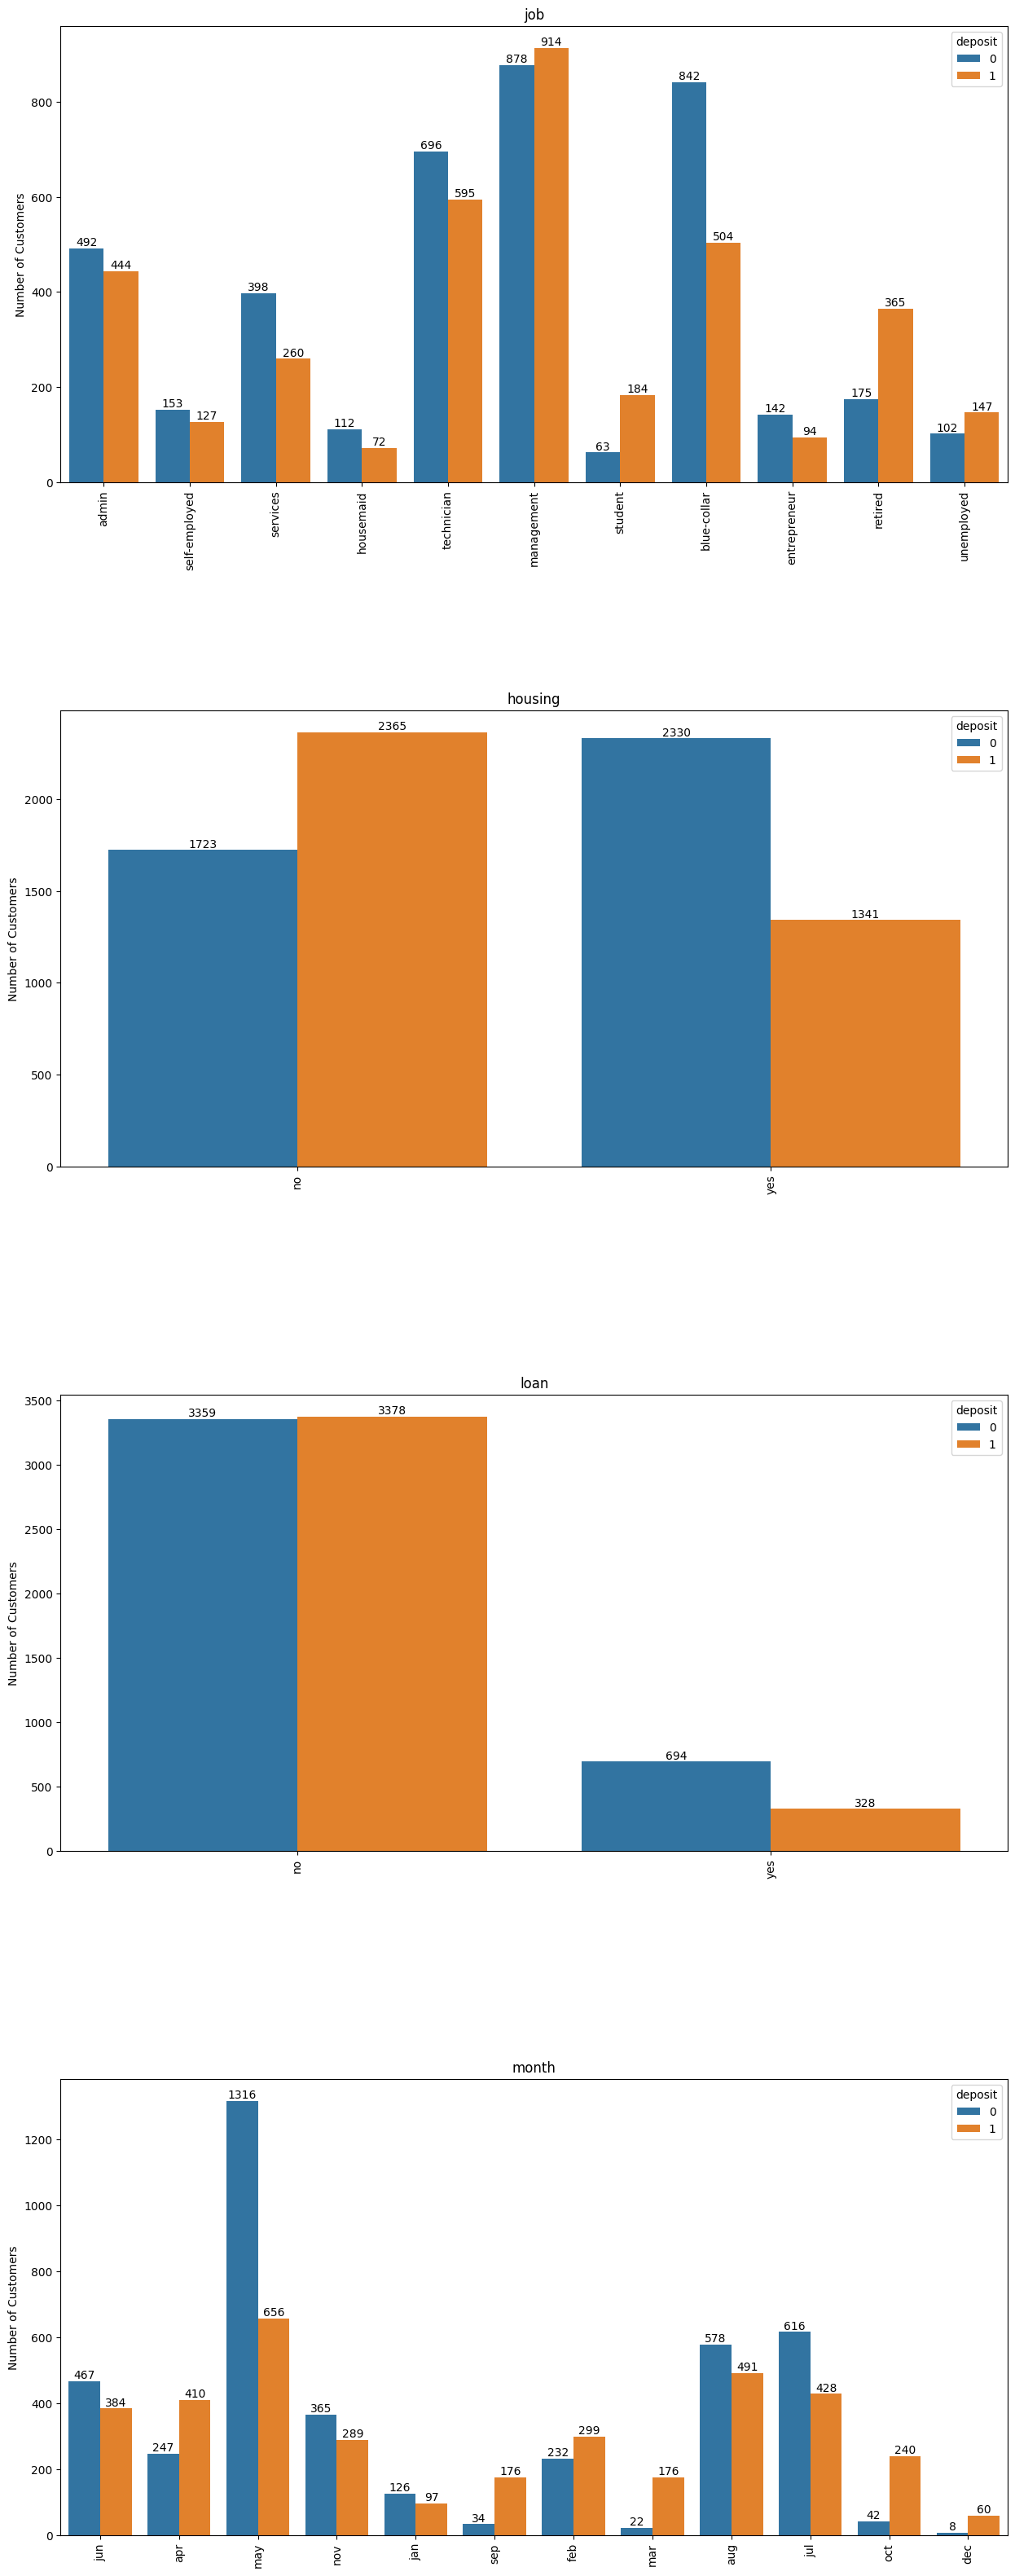

In [450]:
categories = ['job', 'housing', 'loan', 'month']

fig, axes = plt.subplots(nrows = len(categories), figsize = (15,40))

for i in range(len(categories)):
    axes[i].set_title(str(categories[i]))
    sns.countplot(ax = axes[i], x = df[categories[i]], hue = df['deposit'])
    axes[i].set(xlabel = '', ylabel = 'Number of Customers')
    # axes[i].set_yscale('log')
    axes[i].tick_params(axis = 'x', rotation = 90)

    for k in axes[i].containers:
        axes[i].bar_label(k)
        
    plt.subplots_adjust(hspace = 0.5)

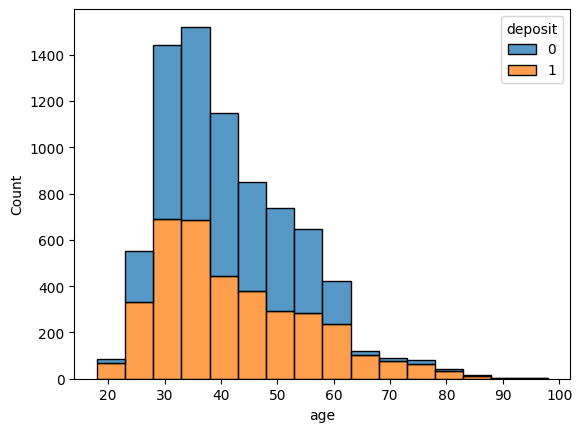

In [451]:
fig1 = sns.histplot(x = df['age'], hue = df['deposit'], binwidth = 5, multiple = "stack")

Figures above show the relationship between each features towards the target (deposit).

# Feature Selection

We have dropped poutcome and contact column.
Now we will Encode the remaining dataset.

In [452]:
X = df
X.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
3809,45,blue-collar,7895,yes,no,cellular,feb,1,-1,1
5859,56,management,616,no,no,cellular,apr,1,83,1
1991,32,management,974,yes,no,unknown,jun,1,-1,0
899,55,technician,517,yes,yes,cellular,feb,3,263,0
6265,39,blue-collar,649,yes,no,cellular,apr,1,-1,1


In [453]:
y = df['deposit']


#### Encoding

Manually Label Encode the dataset for housing and loan column.

In [454]:
X['housing'] = X['housing'].replace({'yes':1, 'no':0})
X['loan'] = X['loan'].replace({'yes':1, 'no':0})
X.sample(5)


,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
4620,39,blue-collar,1756,1,0,cellular,apr,1,-1,1
1226,46,technician,4023,1,0,cellular,aug,2,-1,0
5245,51,technician,11222,1,0,cellular,nov,2,171,0
4891,35,blue-collar,154,1,0,unknown,may,4,-1,0
166,28,self-employed,805,0,0,cellular,nov,5,170,0


Manually Ordinal Encode the month column.

In [455]:
X['month'] = X['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
X.sample(5)


,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
3592,26,student,100,0,0,cellular,5,1,-1,1
6397,28,services,4,1,0,unknown,6,5,-1,0
2393,48,technician,23495,0,0,cellular,8,8,-1,0
3892,25,management,219,0,0,cellular,4,1,-1,1
4974,33,blue-collar,925,0,0,cellular,11,3,-1,0


In [456]:
#Drop job - Preparation for OHE
X1 = X.drop(['job','deposit','contact'], axis = 1)

#Label Encoder
le = LabelEncoder()
X2 = X[['job','contact']].apply(LabelEncoder().fit_transform)

#Combine both Dataframe
X3 = pd.concat([X1, X2], axis = 1)
X3.sample(5)

,age,balance,housing,loan,month,campaign,pdays,job,contact
6619,48,0,0,0,6,4,-1,9,2
4776,26,-12,1,0,6,1,-1,0,2
6402,36,353,0,0,8,2,181,6,0
4403,24,8165,0,0,9,1,-1,8,0
4175,56,202,1,0,5,2,-1,0,2


One Hot Encoding for job column.

In [457]:
job_ohenc = pd.get_dummies(df['job'], prefix = 'Job')
job_ohenc.sample(5)

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
2673,0,0,0,0,0,1,0,0,0,0,0
5293,0,0,0,0,1,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,1,0
1121,0,0,0,0,0,0,0,0,0,1,0
3915,0,0,0,0,0,0,0,0,0,1,0


In [458]:
X_Cleaned = pd.concat([X3.drop(['job'], axis = 1), job_ohenc], axis = 1)
X_Cleaned.sample(5)

,age,balance,housing,loan,month,campaign,pdays,contact,Job_admin,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
7661,31,190,0,0,4,1,-1,0,1,0,0,0,0,0,0,0,0,0,0
2501,31,1761,1,0,7,3,440,1,0,0,0,0,1,0,0,0,0,0,0
5276,23,1298,0,0,7,1,-1,0,0,0,0,0,0,0,0,0,1,0,0
1383,59,2965,1,0,5,3,-1,0,0,0,0,0,0,0,0,1,0,0,0
5548,59,3648,0,0,6,3,-1,1,0,0,0,0,0,1,0,0,0,0,0


Note: I have problems and errors from using Scikit-learn Transformer. Thus, I encoded the dataset this way.

# Machine Learning Model

First we will test all classification machine learning model and choose which model that we will choose based on the accuracy score result.

#### Data Splitting

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X_Cleaned, y, test_size = 0.30, random_state = 101)

#### Logistic Regression

In [460]:
logresmodel = LogisticRegression()
logresmodel.fit(X_train, y_train)

LogisticRegression()

In [461]:
y_pred_logresmodel = logresmodel.predict(X_test)

In [462]:
print(classification_report(y_test, y_pred_logresmodel))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1231
           1       0.62      0.65      0.64      1097

    accuracy                           0.65      2328
   macro avg       0.65      0.65      0.65      2328
weighted avg       0.65      0.65      0.65      2328



In [463]:
cf_matrix_logresmodel = confusion_matrix(y_test, y_pred_logresmodel)

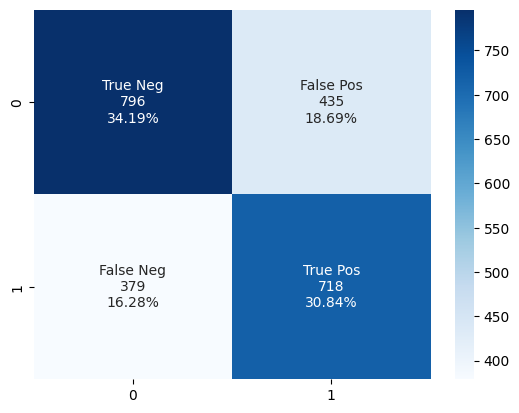

In [464]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_logresmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_logresmodel.flatten()/np.sum(cf_matrix_logresmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_logresmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

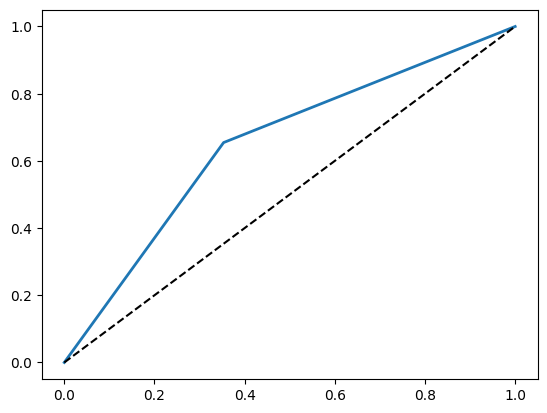

In [465]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_logresmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [466]:
ROC_AUC_logresmodel = roc_auc_score(y_test, y_pred_logresmodel)

print(ROC_AUC_logresmodel)

0.6505705316989618


#### Decision Tree

In [467]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [468]:
y_pred_dtreemodel = dtree.predict(X_test)

In [469]:
print(classification_report(y_test, y_pred_dtreemodel))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1231
           1       0.61      0.61      0.61      1097

    accuracy                           0.63      2328
   macro avg       0.63      0.63      0.63      2328
weighted avg       0.63      0.63      0.63      2328



In [470]:
cf_matrix_dtreemodel = confusion_matrix(y_test, y_pred_dtreemodel)

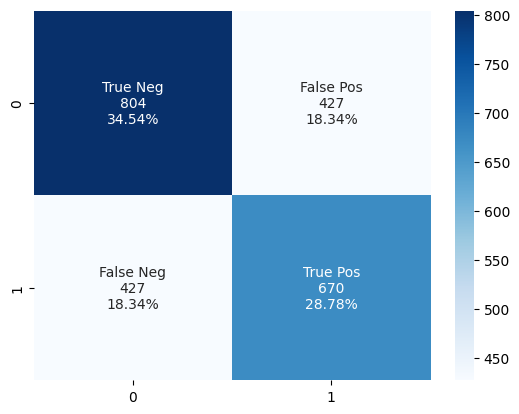

In [471]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_dtreemodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_dtreemodel.flatten()/np.sum(cf_matrix_dtreemodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dtreemodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

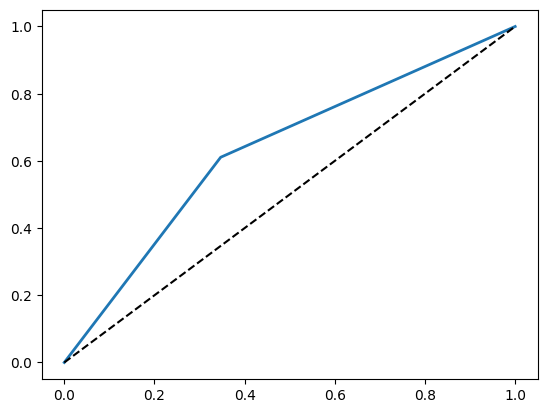

In [472]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_dtreemodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [473]:
ROC_AUC_dtreemodel = roc_auc_score(y_test, y_pred_dtreemodel)

print(ROC_AUC_dtreemodel)

0.6319420737599849


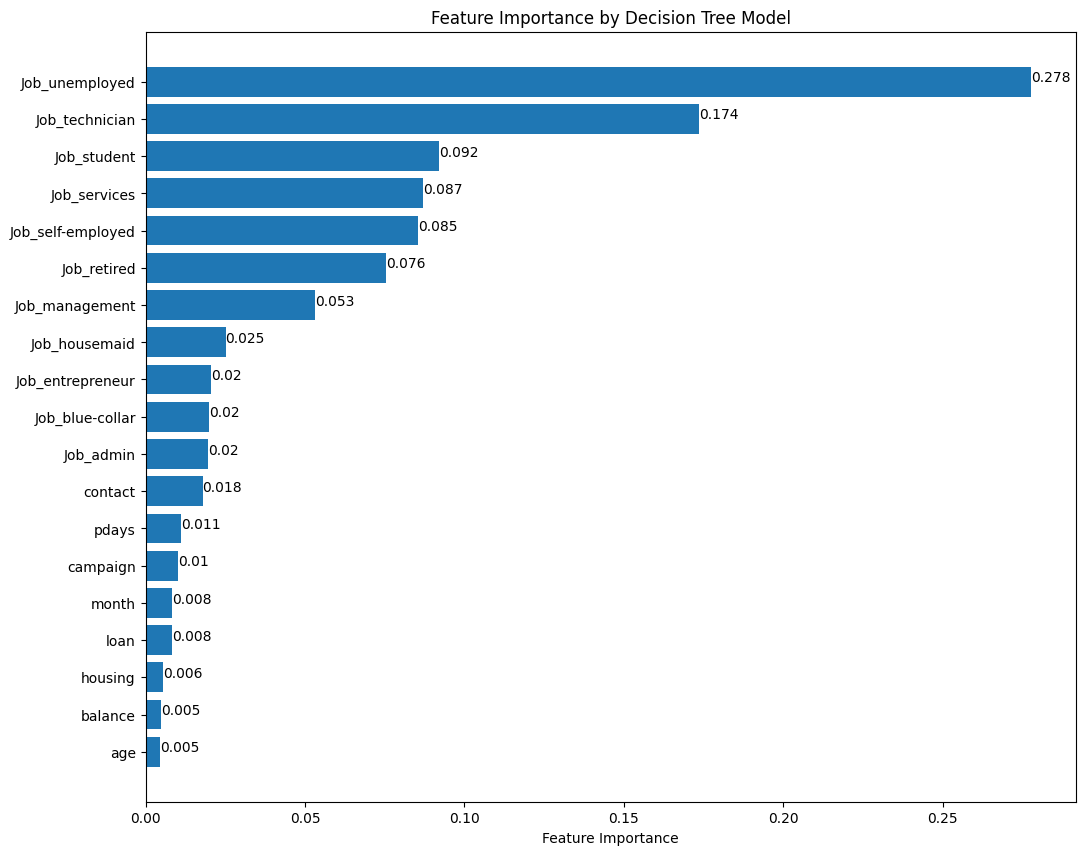

In [474]:
sort = dtree.feature_importances_.argsort()

plt.figure(figsize = (12,10))
plt.title('Feature Importance by Decision Tree Model')
plt.barh(X_Cleaned.columns, dtree.feature_importances_[sort])
plt.xlabel("Feature Importance")


for index, value in enumerate(dtree.feature_importances_[sort]):
    plt.text(value, index, str(round(value, 3)))



#### Random Forest

In [475]:
rfmodel = RandomForestClassifier(n_estimators = 100)
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

In [476]:
y_pred_rfmodel = rfmodel.predict(X_test)

In [477]:
print(classification_report(y_test, y_pred_rfmodel))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1231
           1       0.69      0.63      0.66      1097

    accuracy                           0.69      2328
   macro avg       0.69      0.69      0.69      2328
weighted avg       0.69      0.69      0.69      2328



In [478]:
cf_matrix_rfmodel = confusion_matrix(y_test, y_pred_rfmodel)

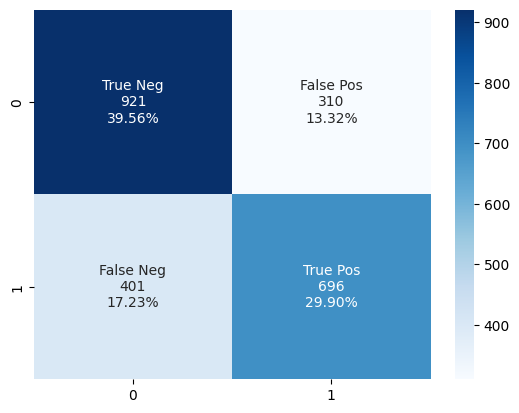

In [479]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_rfmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_rfmodel.flatten()/np.sum(cf_matrix_rfmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_rfmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

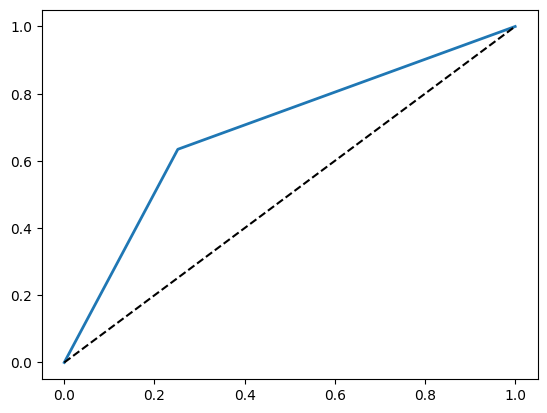

In [480]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rfmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [481]:
ROC_AUC_rfmodel = roc_auc_score(y_test, y_pred_rfmodel)

print(ROC_AUC_rfmodel)

0.6913149146886827


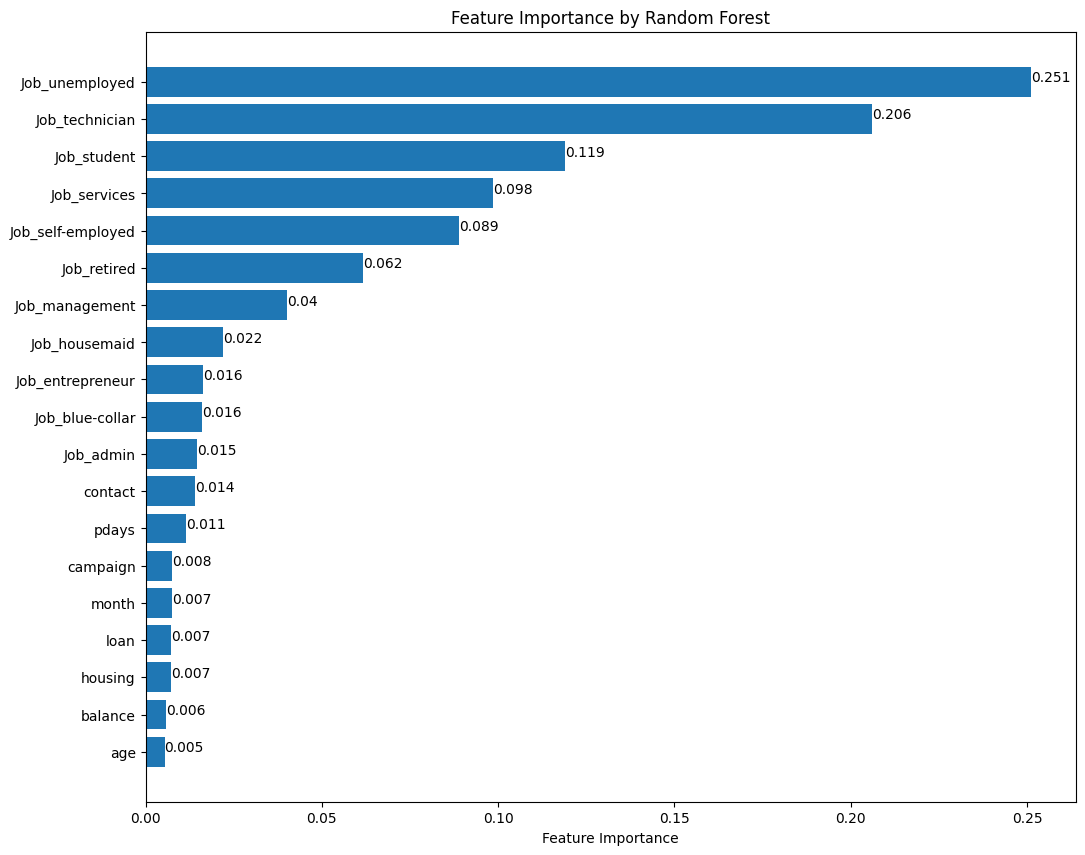

In [482]:
sort = rfmodel.feature_importances_.argsort()

plt.figure(figsize = (12,10))
plt.title('Feature Importance by Random Forest')
plt.barh(X_Cleaned.columns, rfmodel.feature_importances_[sort])
plt.xlabel("Feature Importance")
   
for index, value in enumerate(rfmodel.feature_importances_[sort]):
    plt.text(value, index, str(round(value, 3)))

#### Naive Bayes

In [483]:
gnbmodel = GaussianNB()
gnbmodel.fit(X_train, y_train)

GaussianNB()

In [484]:
y_pred_gnbmodel = gnbmodel.predict(X_test)

In [485]:
print(classification_report(y_test, y_pred_gnbmodel))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1231
           1       0.62      0.58      0.60      1097

    accuracy                           0.63      2328
   macro avg       0.63      0.63      0.63      2328
weighted avg       0.63      0.63      0.63      2328



In [486]:
cf_matrix_gnbmodel = confusion_matrix(y_test, y_pred_gnbmodel)

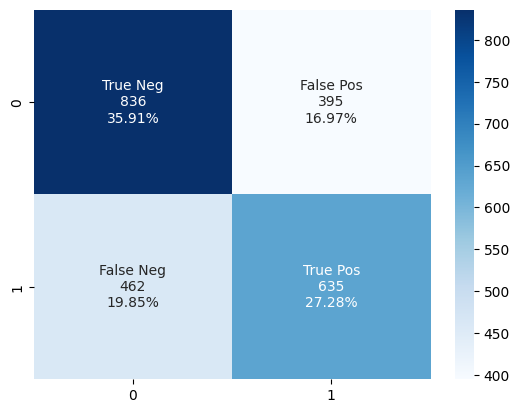

In [487]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_gnbmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_gnbmodel.flatten()/np.sum(cf_matrix_gnbmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_gnbmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

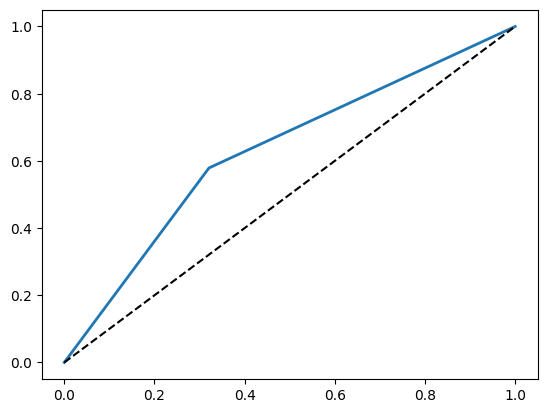

In [488]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_gnbmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [489]:
ROC_AUC_gnbmodel = roc_auc_score(y_test, y_pred_gnbmodel)

print(ROC_AUC_gnbmodel)

0.6289870387223999


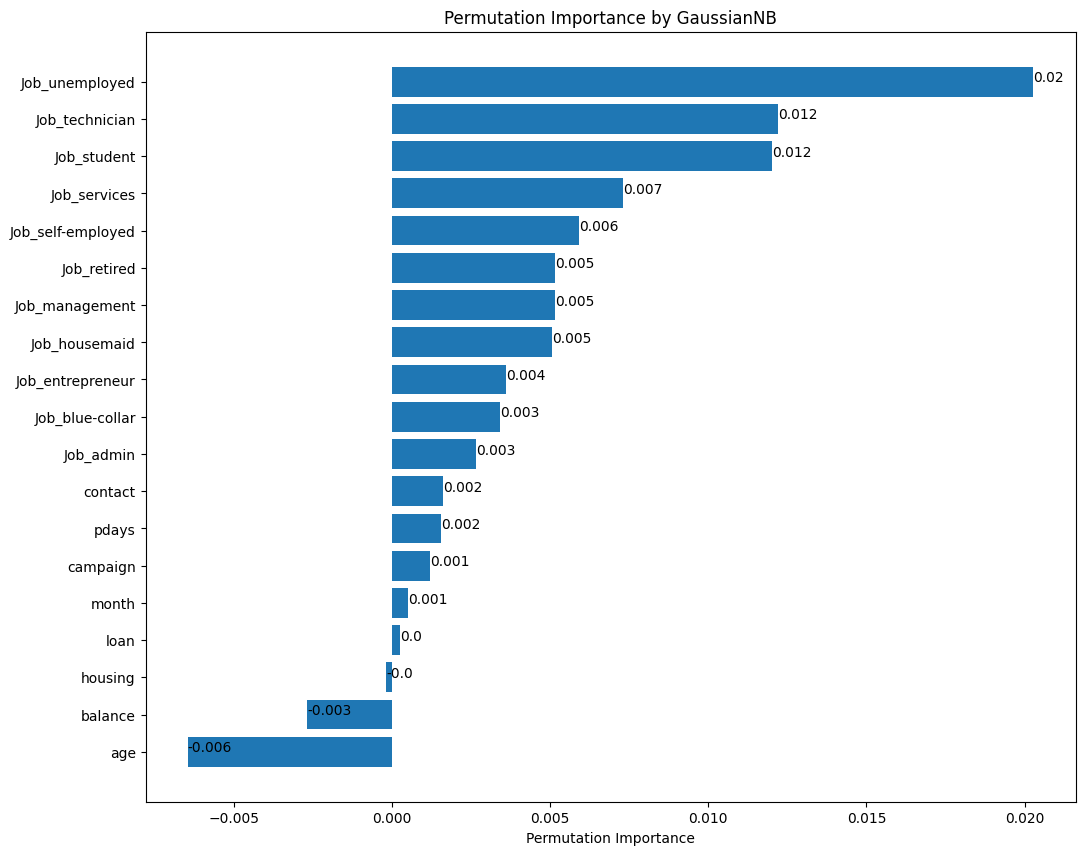

In [490]:
imps = permutation_importance(gnbmodel, X_test, y_test)
sort = imps.importances_mean.argsort()

plt.figure(figsize = (12,10))
plt.title('Permutation Importance by GaussianNB')
plt.barh(X_Cleaned.columns, imps.importances_mean[sort])
plt.xlabel("Permutation Importance")

for index, value in enumerate(imps.importances_mean[sort]):
    plt.text(value, index, str(round(value, 3)))

#### K-Nearest Neighbor

In [491]:
knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [492]:
y_pred_knnmodel = knnmodel.predict(X_test)

In [493]:
print(classification_report(y_test, y_pred_knnmodel))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1231
           1       0.55      0.56      0.55      1097

    accuracy                           0.58      2328
   macro avg       0.58      0.58      0.58      2328
weighted avg       0.58      0.58      0.58      2328



In [494]:
cf_matrix_knnmodel = confusion_matrix(y_test, y_pred_knnmodel)

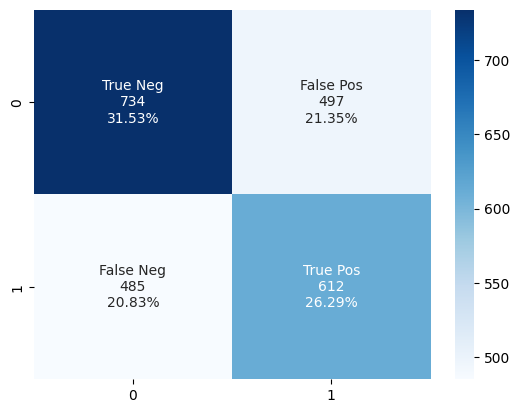

In [495]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_knnmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_knnmodel.flatten()/np.sum(cf_matrix_knnmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knnmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

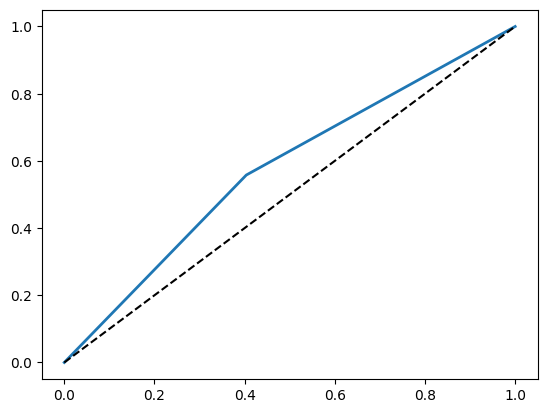

In [496]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_knnmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [497]:
ROC_AUC_knnmodel = roc_auc_score(y_test, y_pred_knnmodel)

print(ROC_AUC_knnmodel)

0.5770741709721587


#### Support Vector Machine

In [498]:
svmmodel = SVC()
svmmodel.fit(X_train, y_train)

SVC()

In [499]:
y_pred_svmmodel = svmmodel.predict(X_test)

In [500]:
print(classification_report(y_test, y_pred_svmmodel))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1231
           1       0.57      0.41      0.47      1097

    accuracy                           0.57      2328
   macro avg       0.57      0.56      0.56      2328
weighted avg       0.57      0.57      0.56      2328



In [501]:
cf_matrix_svmmodel = confusion_matrix(y_test, y_pred_svmmodel)

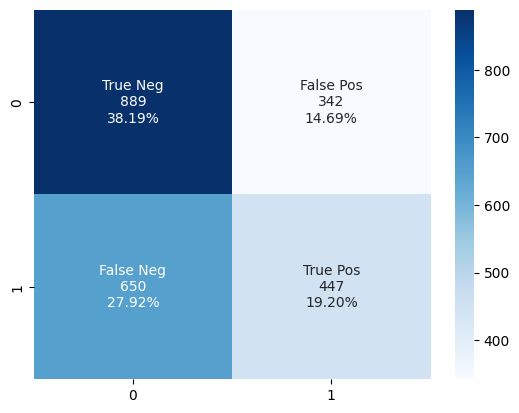

In [502]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_svmmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_svmmodel.flatten()/np.sum(cf_matrix_svmmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_svmmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

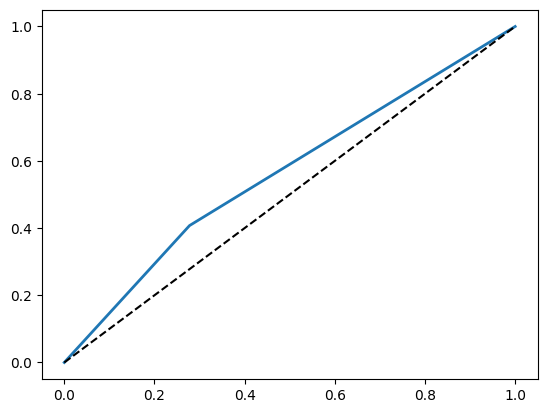

In [503]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_svmmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [504]:
ROC_AUC_svmmodel = roc_auc_score(y_test, y_pred_svmmodel)

print(ROC_AUC_svmmodel)

0.5648260117135057


#### Gradient Boosting

In [505]:
gbcmodel = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 101)

In [506]:
gbcmodel.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=101)

In [507]:
y_pred_gbcmodel = gbcmodel.predict(X_test)

In [508]:
print(classification_report(y_test, y_pred_gbcmodel))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1231
           1       0.72      0.64      0.67      1097

    accuracy                           0.71      2328
   macro avg       0.71      0.71      0.71      2328
weighted avg       0.71      0.71      0.71      2328



In [509]:
cf_matrix_gbcmodel = confusion_matrix(y_test, y_pred_gbcmodel)

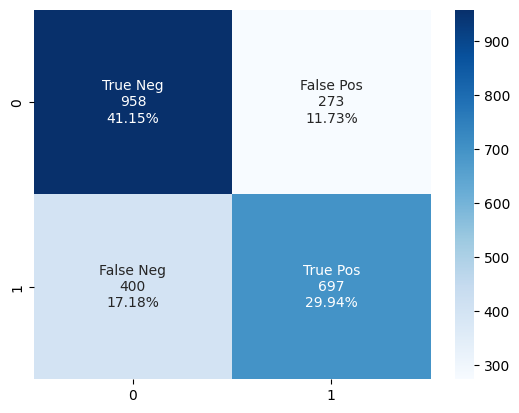

In [510]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_gbcmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_gbcmodel.flatten()/np.sum(cf_matrix_gbcmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_gbcmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

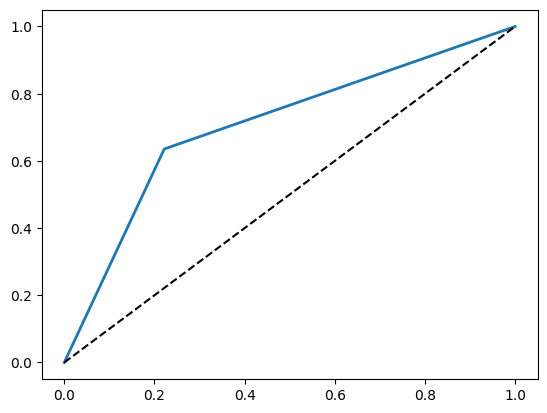

In [511]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_gbcmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [512]:
ROC_AUC_gbcmodel = roc_auc_score(y_test, y_pred_gbcmodel)

print(ROC_AUC_gbcmodel)

0.7067991353717806


#### Model Evaluation

In [513]:
names = ['Logistic Regression' , 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbor', 'Support Vector Machine', 'Gradient Boosting']

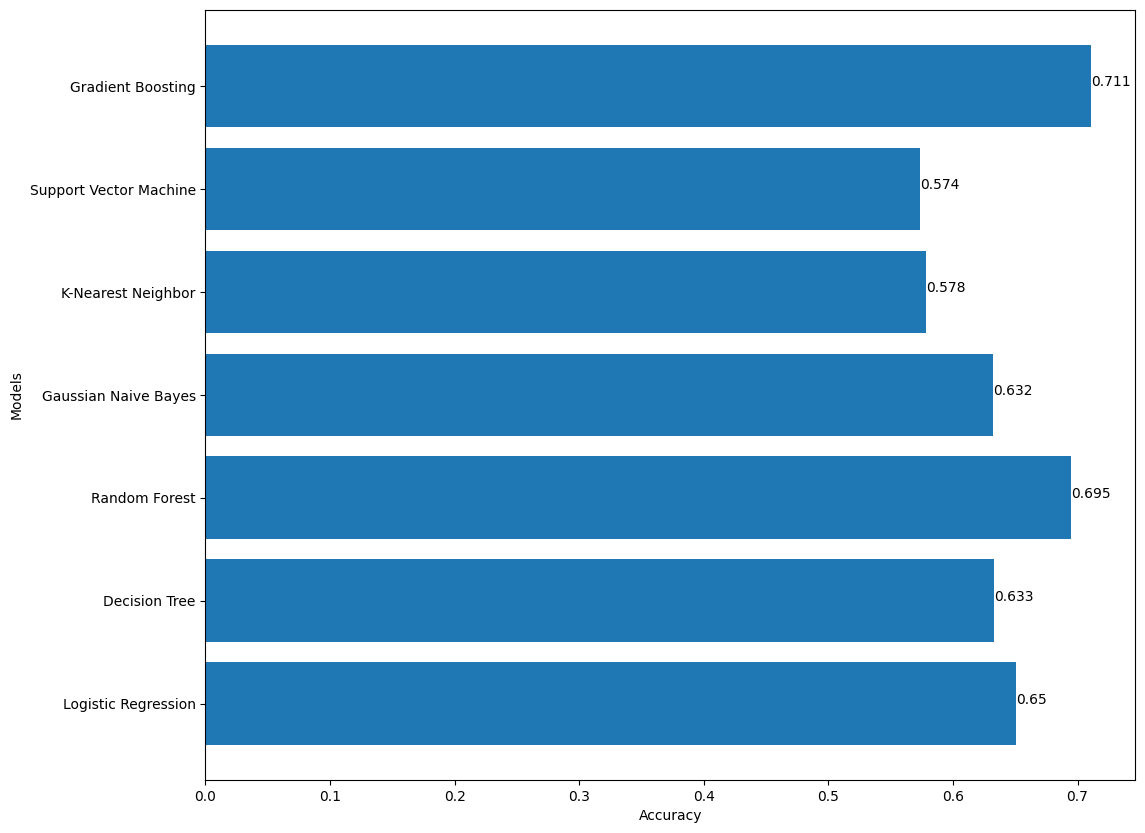

In [514]:
acc = [classification_report(y_test, y_pred_logresmodel, output_dict = True)['accuracy'], 
       classification_report(y_test, y_pred_dtreemodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_rfmodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_gnbmodel, output_dict = True)['accuracy'], 
       classification_report(y_test, y_pred_knnmodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_svmmodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_gbcmodel, output_dict = True)['accuracy']]

plt.figure(figsize = (12,10))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')


for index, value in enumerate(acc):
    plt.text(value, index, str(round(value, 3)))

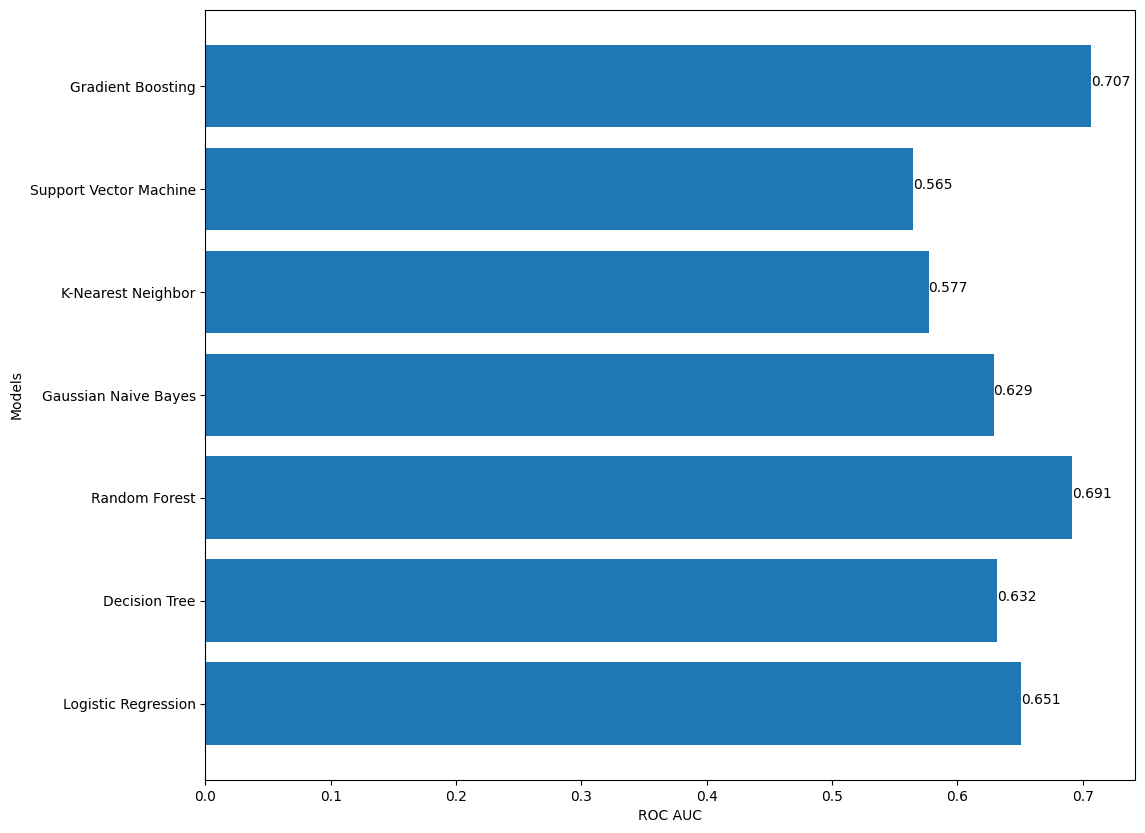

In [515]:
acc = [ROC_AUC_logresmodel, ROC_AUC_dtreemodel, ROC_AUC_rfmodel, ROC_AUC_gnbmodel, ROC_AUC_knnmodel, ROC_AUC_svmmodel, ROC_AUC_gbcmodel]

plt.figure(figsize = (12,10))
graph = plt.barh(names, acc)
plt.xlabel('ROC AUC')
plt.ylabel('Models')

for index, value in enumerate(acc):
    plt.text(value, index, str(round(value, 3)))

In [516]:
print(classification_report(y_test, y_pred_logresmodel))
print(classification_report(y_test, y_pred_dtreemodel))
print(classification_report(y_test, y_pred_rfmodel))
print(classification_report(y_test, y_pred_gnbmodel))
print(classification_report(y_test, y_pred_knnmodel))
print(classification_report(y_test, y_pred_svmmodel))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1231
           1       0.62      0.65      0.64      1097

    accuracy                           0.65      2328
   macro avg       0.65      0.65      0.65      2328
weighted avg       0.65      0.65      0.65      2328

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1231
           1       0.61      0.61      0.61      1097

    accuracy                           0.63      2328
   macro avg       0.63      0.63      0.63      2328
weighted avg       0.63      0.63      0.63      2328

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1231
           1       0.69      0.63      0.66      1097

    accuracy                           0.69      2328
   macro avg       0.69      0.69      0.69      2328
weighted avg       0.69      0.69      0.69      2328

              preci

From the result, we can see the top three model with the highest accuracy are: 
1. Gradient Boost
2. Random Forest
3. Logistic Regression

Next, we will try to do stacking method into the random forest model to enchance its accuracy.

# Ensemble Method - Stacking

In [517]:
# define the base models (Level 0)
level0 = list()
level0.append(('gbcmodel', GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 101)))
level0.append(('rfmodel', RandomForestClassifier(n_estimators = 100)))
level0.append(('gnbmodel', GaussianNB()))

# define meta learner model (Level 1)
level1 = LogisticRegression()

# define the stacking ensemble
stackmodel = StackingClassifier(estimators = level0, final_estimator = level1)

In [518]:
stackmodel.fit(X_train, y_train)

StackingClassifier(estimators=[('gbcmodel',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           random_state=101)),
                               ('rfmodel', RandomForestClassifier()),
                               ('gnbmodel', GaussianNB())],
                   final_estimator=LogisticRegression())

In [519]:
y_pred_stackmodel = stackmodel.predict(X_test)

In [520]:
print(classification_report(y_test, y_pred_stackmodel))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1231
           1       0.72      0.65      0.68      1097

    accuracy                           0.71      2328
   macro avg       0.71      0.71      0.71      2328
weighted avg       0.71      0.71      0.71      2328



In [521]:
cf_matrix_stackmodel = confusion_matrix(y_test, y_pred_stackmodel)

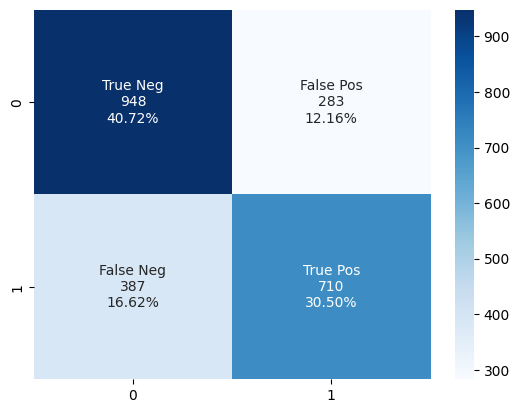

In [522]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_stackmodel.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_stackmodel.flatten()/np.sum(cf_matrix_stackmodel)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_stackmodel, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

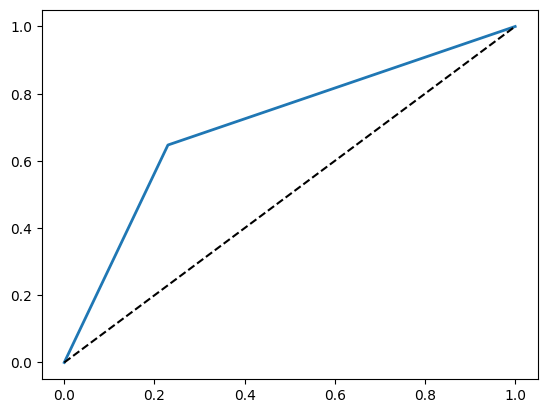

In [523]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_stackmodel)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [524]:
ROC_AUC_stackmodel = roc_auc_score(y_test, y_pred_stackmodel)

print(ROC_AUC_stackmodel)

0.7086626476314177


# Model Evaluation 2

In [525]:
names = ['Logistic Regression' , 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Stacking']


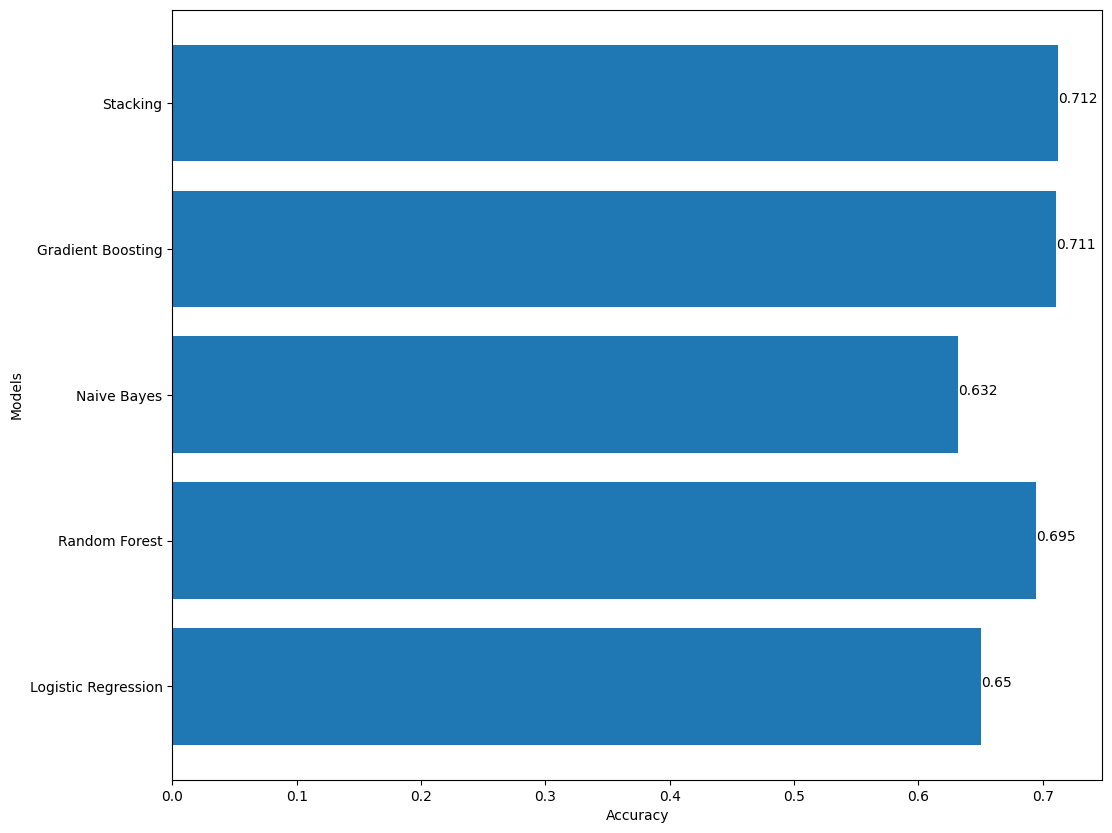

In [526]:
acc = [classification_report(y_test, y_pred_logresmodel, output_dict = True)['accuracy'], 
       classification_report(y_test, y_pred_rfmodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_gnbmodel, output_dict = True)['accuracy'], 
       classification_report(y_test, y_pred_gbcmodel, output_dict = True)['accuracy'],
       classification_report(y_test, y_pred_stackmodel, output_dict = True)['accuracy']]

plt.figure(figsize = (12,10))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')

for index, value in enumerate(acc):
    plt.text(value, index, str(round(value, 3)))

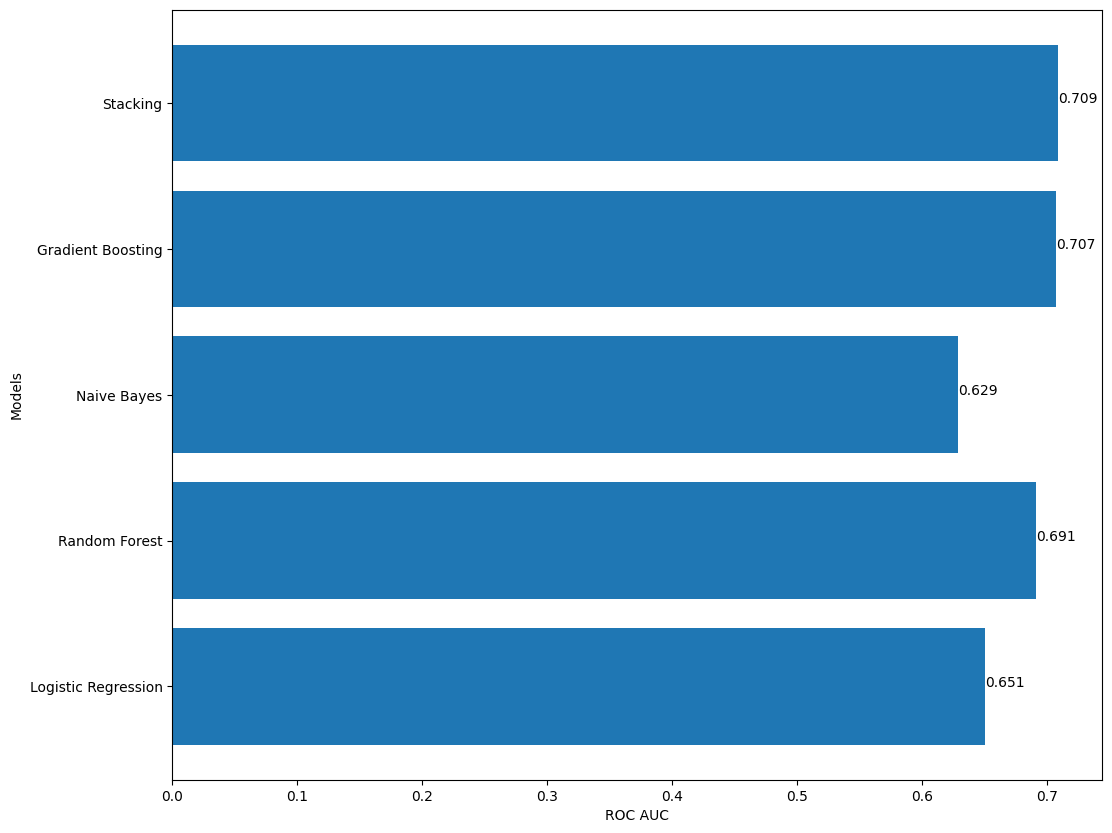

In [527]:
acc = [ROC_AUC_logresmodel, ROC_AUC_rfmodel, ROC_AUC_gnbmodel, ROC_AUC_gbcmodel, ROC_AUC_stackmodel]

plt.figure(figsize = (12,10))
graph = plt.barh(names, acc)
plt.xlabel('ROC AUC')
plt.ylabel('Models')

for index, value in enumerate(acc):
    plt.text(value, index, str(round(value, 3)))

By using stacking (ensemble method) the accuracy increases about 1%. 

Next, we will try to do random forest with hyperparameter tuning.

# Random Forest with Hyperparameter Tuning

Text(0, 0.5, 'Testing Accuracy')

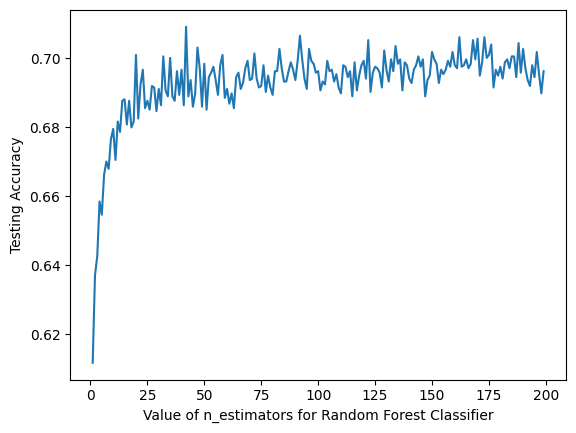

In [528]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

The Accuracy Percentage is in the range of low 70-ish.

Create a new dataset from scratch to avoid error.

In [529]:
abt = pd.read_csv('data_bank_marketing_campaign.csv')
abt.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [530]:
def target_bool(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [531]:
abt['deposit'] = abt['deposit'].apply(target_bool)
abt.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


In [532]:
#Separate dataframe into separate object

# Object for target variable
y = abt.deposit

# object for input features
X = abt.drop(['deposit'], axis=1)

# display shapes of X and y
print(X.shape, y.shape)

(7813, 10) (7813,)


In [533]:
# List numerical features
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['age', 'balance', 'campaign', 'pdays']

In [534]:
# List categorical features
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns


['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [535]:
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    abt2 = pd.DataFrame(np.array(kv).T, columns=['deposit','Count'])
    abt2['Count'] = abt2['Count'].astype('int64')
    abt2['%'] = round(abt2['Count'] / a.shape[0] * 100, 2)
    return abt2.sort_values('Count',ascending=False)


In [536]:
class_count(y)

,deposit,Count,%
1,0,4081,52.23
0,1,3732,47.77


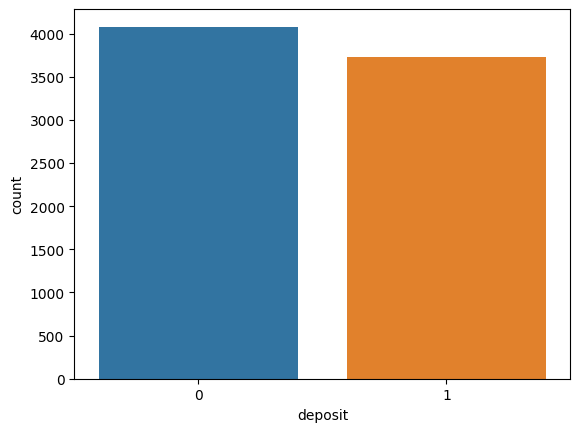

In [537]:
sns.countplot(data = abt, x = 'deposit')
plt.show()

In [538]:
random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=abt.deposit)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))


5469 2344 5469 2344


In [539]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5469 entries, 6430 to 5366
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       5469 non-null   int64 
 1   job       5469 non-null   object
 2   balance   5469 non-null   int64 
 3   housing   5469 non-null   object
 4   loan      5469 non-null   object
 5   contact   5469 non-null   object
 6   month     5469 non-null   object
 7   campaign  5469 non-null   int64 
 8   pdays     5469 non-null   int64 
 9   poutcome  5469 non-null   object
dtypes: int64(4), object(6)
memory usage: 470.0+ KB


In [540]:
num_features = [] 

for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)
print(num_features)  


[0, 2, 7, 8]


In [541]:
cat_features = []

for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)
print(cat_features) 

[1, 3, 4, 5, 6, 9]


In [542]:
# Define column transformer
# Need to be numeric not string to specify columns name 
preprocess = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)
preprocess


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(), [0, 2, 7, 8]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 3, 4, 5, 6, 9])])

In [543]:
# Import classifier
from sklearn.ensemble import RandomForestClassifier

# Define model with pipeline
model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  RandomForestClassifier())

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 2, 7, 8]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 3, 4, 5, 6, 9])])),
                ('smote', SMOTE(random_state=10)),
                ('randomforestclassifier', RandomForestClassifier())])

In [544]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}
rf_grid = GridSearchCV(model, rf_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [545]:
X_train = X_train.values
X_test = X_test.values

In [546]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.681 total time=   0.6s
[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.692 total time=   0.6s
[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.683 total time=   0.5s
[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 2,
                                                                          7,
                                                                          8]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6,
                                                                          9])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_features': ['sqrt', 0.33],
                         'randomforestclassifier__min_samples_leaf': [1, 5, 10,
                                                                      15],
                         'randomforestclassifier__min_samples_split': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]},
             scoring='accuracy', verbose=3)

In [547]:
print(rf_grid.best_params_)


{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 150}


In [548]:
print(rf_grid.best_score_)

0.7169508138043156


In [549]:
print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")


Training Data Score: 0.7983177911866887
Testing Data Score: 0.7261092150170648


In [550]:
predictions = rf_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 0 0 1 0 0 1 0 1 0]
First 10 Actual labels: [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]


In [551]:
result = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
result


,Prediction,Actual
0,1,1
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
2339,1,1
2340,0,0
2341,0,0
2342,0,0


In [552]:
cm = confusion_matrix(y_test, predictions)
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.79 0.21]
 [0.34 0.66]]


In [554]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

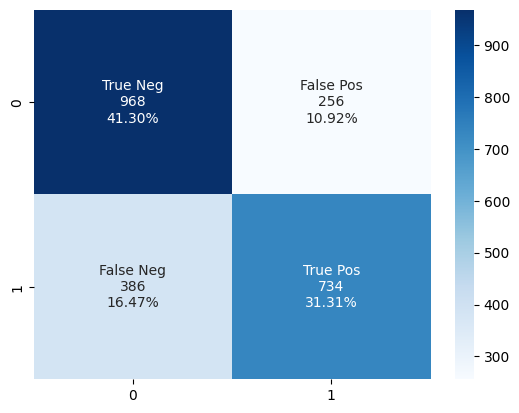

In [555]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

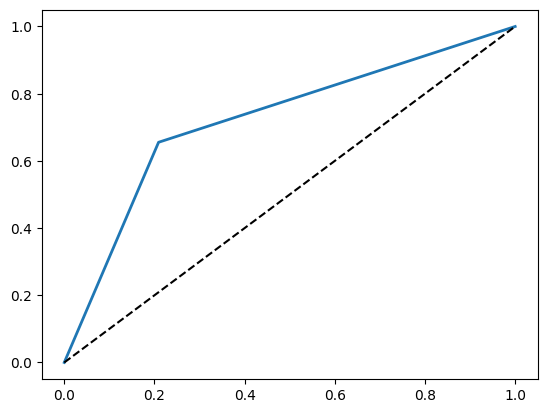

In [556]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--' )
plt.show()

In [557]:
ROC_AUC = roc_auc_score(y_test, predictions)

print(ROC_AUC)

0.7231034080298786


In [558]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1224
           1       0.74      0.66      0.70      1120

    accuracy                           0.73      2344
   macro avg       0.73      0.72      0.72      2344
weighted avg       0.73      0.73      0.72      2344



By using Hyperparameter the Random Forest Model increase their accuracy by 3%.

This model has an accuracy of 73%.

The Precision, Recall and F1-score is shown above.


# Conclusion & Recommendation

#### Conclusion
It is possible to predict the likeliness of a customer who wants subscribe for a deposit in the future by using machine learning through Bank X historical data.

However, in building such a model there is pros and cons. In this case, the highest accuracy to do the prediction is by using Random Forest with Hyperparamter tuning. The Accuracy is 73%.

By looking through the Random Forest model, importance features from the dataset can help the marketing team for Bank X to decide their target market for their next campaign. The importance feature shows that:
1. Customers who are unemployed has the highest chance of subscribing for a deposit, followed by technician and student.
2. Method of Communication is also imporant, by contacting them through their cellular phone, increase the probability of a deposit.

In contrast, several features such as owning a house, having a loan, their balance and maturity level do not have a high importance when it comes to deposit subscription.

However, there are several aspects that are not included in this project, one of them is the interest Rate. The interest rate may change from time to time and the rate of interest itself reflect on the global economy. For instance, during the pandemic the interest rate is very low. The government want the money to circulate in the market, in order to make the economy more sustain. Since the interest rate is very low, putting the money on a deposit for the purpose of investing is meaningless. Thus, the number of people who have a deposit or want to deposit their money will be decreased.


#### Recommendation

The productivity of marketing team of Bank X can be increased by using this predictive model to make the new targeted market. It shows that the accuracy is 73%, compared to the historical data, the total population who accepted a deposit is ~48%. Thus, the marketing team of Bank X can focus on their effort for the predicted existing customer and create a new customer acquisition strategy based on the findings. 

Actionable plan:
1. Use the model to predict and make their new targeted customer from their existing customer.
2. Contact the targeted customer through their cellular phone
2. Create more personalized marketing campaign based on the findings, to attract new customer that are more likely to subscribe for a deposit.
